<a href="https://colab.research.google.com/github/SadamTorres/Challenge_TelecomX/blob/main/Challenge_TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar base de datos#


Se importa la base de datos en formato json, para un mejor análisis de desanidan las columnas 'costumer','phone','internet' y 'account'.

In [ ]:
#Importar base de datos y normalizar columnas anidadas#
import pandas as pd
import json

with open('TelecomX_Data.json') as f:
    data = json.load(f)

datos_normalizado = pd.json_normalize(data, sep='_')
datos_normalizado

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Se verifica el tipo de datos contenido en cada una de las columnas:

In [ ]:
#obteniendo información de las columnas para tratar datos#
datos_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

La columna de cargos totales es de tipo objeto, y se realiza la conversión a float64, los datos vaciós o con strings se sustituirán por NaN.

In [ ]:
#convirtiendo columnas 'Charges_Total' a float64#
datos_normalizado['account_Charges_Total'] = pd.to_numeric(datos_normalizado['account_Charges_Total'], errors='coerce')

La columna 'Churn' contiene datos vaciós, para realizar la conversión a número entero primero se sustituyen los valores vacíos por NaN.

In [ ]:
#quitando datos vacíos en columna 'Churn'#
import numpy as np
datos_normalizado['Churn'] = datos_normalizado['Churn'].replace('', np.nan)

Se genera la columna 'Cuentas_Diarias' tomando como base la columna 'Charges_Monthly' y dividiendo el valor entre 30 días. Con esto tendremos un estimado de cuanto paga diario cada cliente por los servicios contratados.

In [ ]:
#Creando columna cuentas diarias#
datos_normalizado['Cuentas_Diarias'] = datos_normalizado['account_Charges_Monthly'] / 30

#Análisis descriptivo de la base de datos#

De las columnas que contienen valores numéricos se realizan estimadores estadístivos básicos para comprender la distrubición de los datos:

In [ ]:
# Análisis descriptivo específico para columnas numéricas seleccionadas
numerical_columns = [
    'account_Charges_Monthly',
    'account_Charges_Total',
    'Cuentas_Diarias',
    'customer_tenure'
]

numerical_stats = datos_normalizado[numerical_columns].describe().transpose()
numerical_stats

,count,mean,std,min,25%,50%,75%,max
account_Charges_Monthly,7267.0,64.720098,30.129572,18.250000,35.425000,70.300000,89.875000,118.750000
account_Charges_Total,7256.0,2280.634213,2268.632997,18.800000,400.225000,1391.000000,3785.300000,8684.800000
Cuentas_Diarias,7267.0,2.157337,1.004319,0.608333,1.180833,2.343333,2.995833,3.958333
customer_tenure,7267.0,32.346498,24.571773,0.000000,9.000000,29.000000,55.000000,72.000000


Para visualizar la cantidad de clientes que cancelan, se realiza un gráfico de barras y de pastel con la proporción de clientes con y sin evasión, aquí observamos que de la totalidad de clientes que se han registrado con TelecomX, más del 25% han cancelado su contrato con la compañía.

/tmp/ipython-input-35-2018141634.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['green', 'red'])


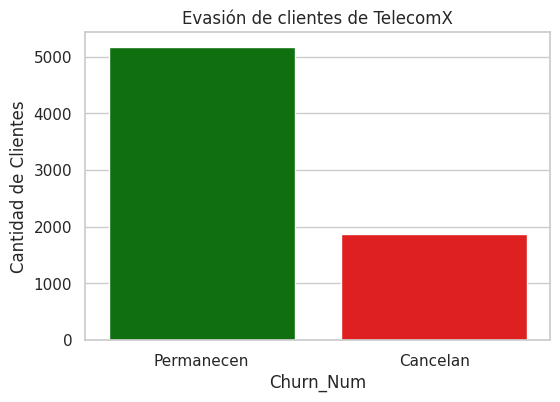

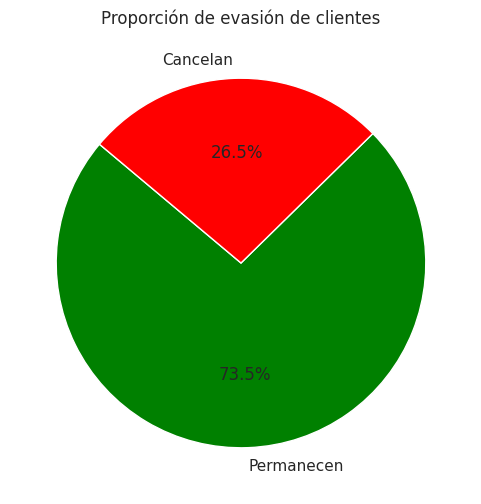

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reemplazar valores de 'Churn' por 1 = Baja, 0 = Permanece, NaN se mantiene
datos_normalizado['Churn_Num'] = datos_normalizado['Churn'].map({'Yes': 1, 'No': 0})

# Conteo de los valores
churn_counts = datos_normalizado['Churn_Num'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette=['green', 'red'])
plt.xticks([0,1], ['Permanecen', 'Cancelan'])
plt.ylabel('Cantidad de Clientes')
plt.title('Evasión de clientes de TelecomX')
plt.show()

# Gráfico de pastel
plt.figure(figsize=(6,6))
plt.pie(churn_counts, labels=['Permanecen', 'Cancelan'], autopct='%1.1f%%', colors=['green', 'red'], startangle=140)
plt.title('Proporción de evasión de clientes')
plt.show()

Analizando más a fondo para determinar los factores que pudieran estar generando la alta cantidad de cancelaciones en la empresa, graficaremos la distribución de los cargos totales respecto a los clientes que han y no han cancelado, también graficaremos el comportamiento respecto a las cuentas diarias y verificaremos si hay alguna relación con la antiguedad de los clientes para corroborar si son clientes nuevos los que cancelan.

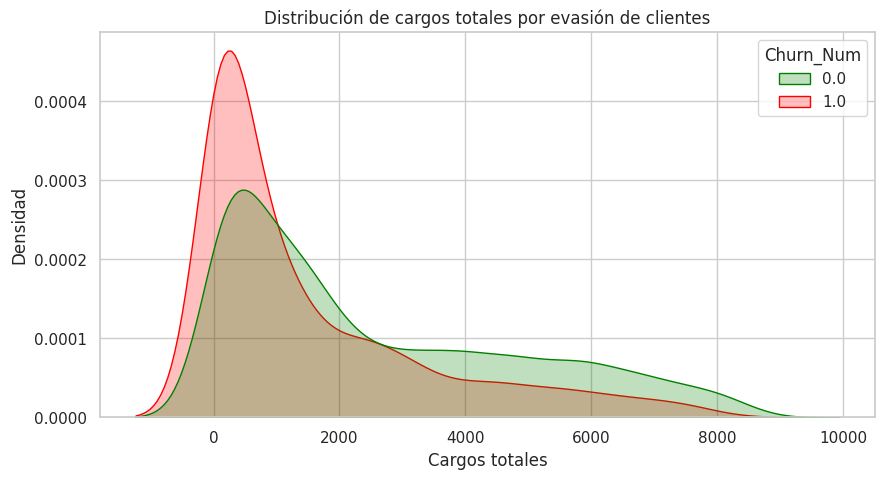

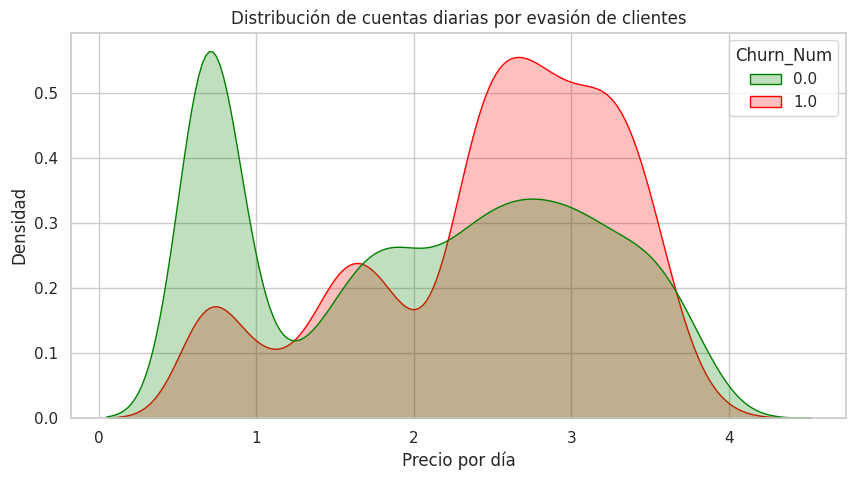

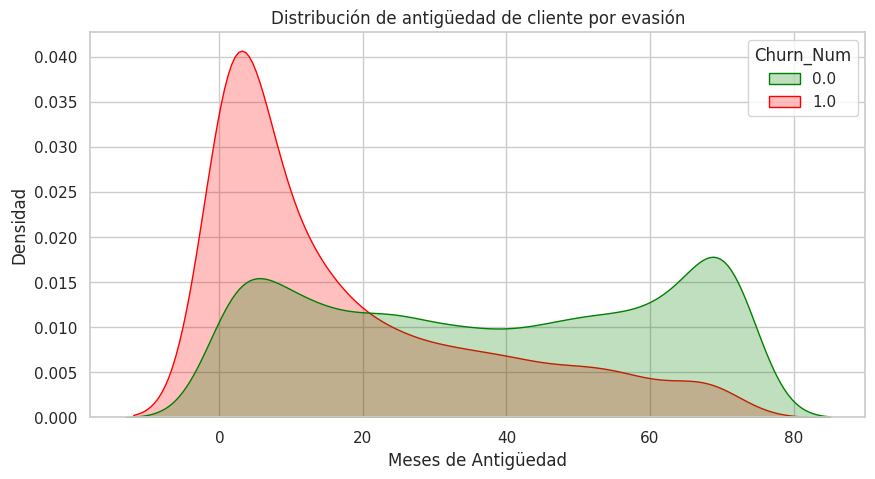

In [ ]:
# Configuración general de estilo
sns.set(style="whitegrid")

# Gráfico de distribución de Total Charges
plt.figure(figsize=(10, 5))
sns.kdeplot(data=datos_normalizado, x='account_Charges_Total', hue='Churn_Num', fill=True, common_norm=False, palette={0: "green", 1: "red"})
plt.title('Distribución de cargos totales por evasión de clientes')
plt.xlabel('Cargos totales')
plt.ylabel('Densidad')
plt.show()

# Gráfico de distribución de cuentas diarias
plt.figure(figsize=(10, 5))
sns.kdeplot(data=datos_normalizado, x='Cuentas_Diarias', hue='Churn_Num', fill=True, common_norm=False, palette={0: "green", 1: "red"})
plt.title('Distribución de cuentas diarias por evasión de clientes')
plt.xlabel('Precio por día')
plt.ylabel('Densidad')
plt.show()

# Gráfico de distribución de Tenure
plt.figure(figsize=(10, 5))
sns.kdeplot(data=datos_normalizado, x='customer_tenure', hue='Churn_Num', fill=True, common_norm=False, palette={0: "green", 1: "red"})
plt.title('Distribución de antigüedad de cliente por evasión')
plt.xlabel('Meses de Antigüedad')
plt.ylabel('Densidad')
plt.show()


Ahora analizaremos el resto de las variables categóricas para detectar si hay alguna relación con la evasión de clientes.

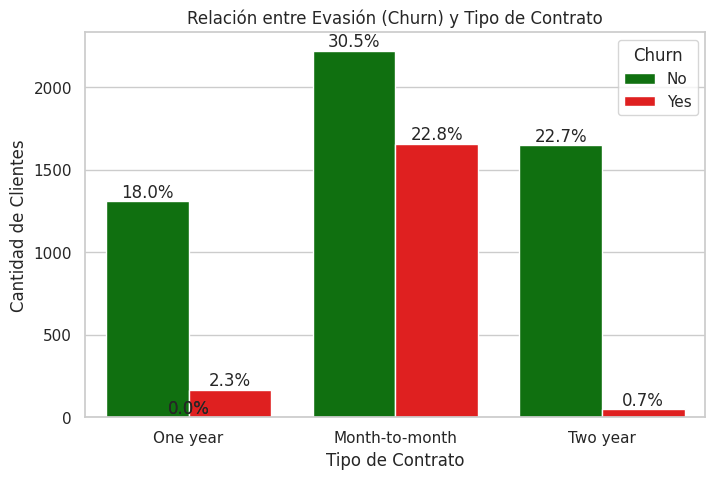

In [ ]:
# Configuración
sns.set(style="whitegrid")

# Gráfico de barras con proporciones de churn por tipo de contrato
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=datos_normalizado, x='account_Contract', hue='Churn', palette={'No': 'green', 'Yes': 'red'})

# Añadir porcentajes encima de las barras
total = len(datos_normalizado)
for p in ax.patches:
    height = p.get_height()
    percentage = f'{100 * height / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title('Evasión de clientes por tipo de contrato')
plt.ylabel('Cantidad de Clientes')
plt.xlabel('Tipo de Contrato')
plt.legend(title='Churn')
plt.show()

Analizando si los clientes con contrato mes a mes tienen mayor cuota diaria y si eso está relacionado con la evasión.

/tmp/ipython-input-40-3108966865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_mtm, x='Churn', y='Cuentas_Diarias', palette={'No': 'green', 'Yes': 'red'})


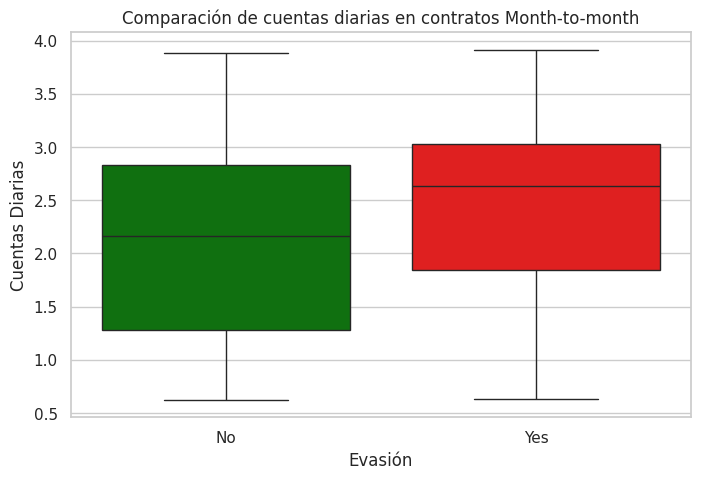

In [ ]:
# Filtrar solo clientes con contrato Month-to-month
df_mtm = datos_normalizado[datos_normalizado['account_Contract'] == 'Month-to-month']

# Crear el boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_mtm, x='Churn', y='Cuentas_Diarias', palette={'No': 'green', 'Yes': 'red'})

plt.title('Comparación de cuentas diarias en contratos Month-to-month')
plt.ylabel('Cuentas Diarias')
plt.xlabel('Evasión')
plt.show()

Ahora verificaremos si hay alguna relación si el cliente tiene o no pareja con que haya o no cancelado contrato.

Tabla de proporciones (%):
 Churn                    No        Yes
customer_Partner                      
No                67.042021  32.957979
Yes               80.335097  19.664903


<Figure size 600x400 with 0 Axes>

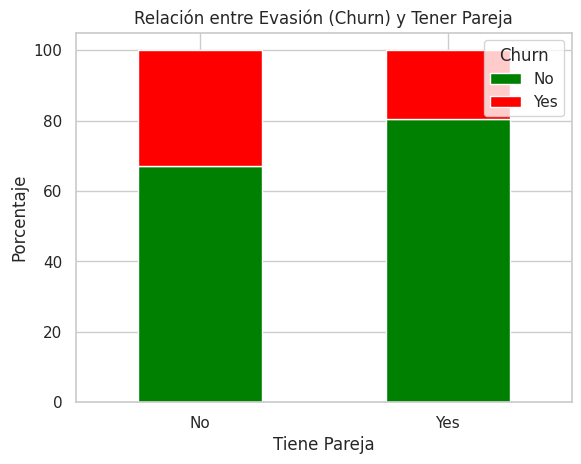

In [ ]:
#Relación entre clientes que cancelan si tienen o no pareja#
# Tabla de contingencia (frecuencia cruzada)
contingencia = pd.crosstab(datos_normalizado['customer_Partner'], datos_normalizado['Churn'], normalize='index') * 100
print("Tabla de proporciones (%):\n", contingencia)

# Gráfico de barras con proporciones
plt.figure(figsize=(6, 4))
contingencia.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Relación entre Evasión (Churn) y Tener Pareja')
plt.ylabel('Porcentaje')
plt.xlabel('Tiene Pareja')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.show()

Revisando si hay relación si el cliente es hombre o mujer.

Proporción de evasión (Churn) por género (%):
 Churn                   No        Yes
customer_gender                      
Female           73.079128  26.920872
Male             73.839662  26.160338


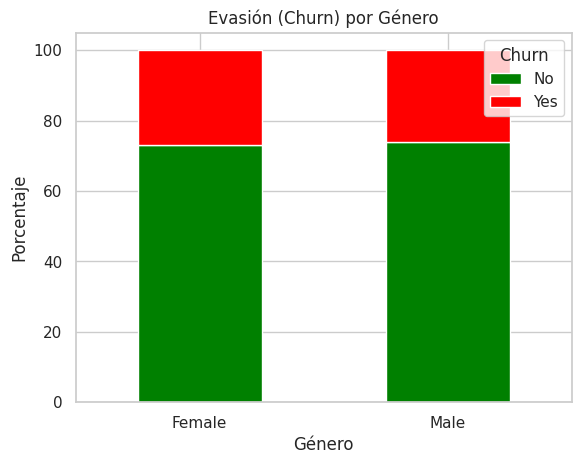

In [ ]:
# Tabla de proporciones de churn por género
tabla = pd.crosstab(datos_normalizado['customer_gender'], datos_normalizado['Churn'], normalize='index') * 100
print("Proporción de evasión (Churn) por género (%):\n", tabla)

# Gráfico de barras apiladas
tabla.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Evasión (Churn) por Género')
plt.ylabel('Porcentaje')
plt.xlabel('Género')
plt.legend(title='Churn', loc='upper right')
plt.xticks(rotation=0)
plt.show()

Ahora realizaremos un análisis sobre la cantidad de servicios contratados, su relación con la cuota diaría y si influye en que un cliente cancele.

In [ ]:
#sumar servicios contratados#
# Lista de columnas a modificar
cols_a_reemplazar = [
    'phone_PhoneService',
    'internet_OnlineBackup',
    'internet_DeviceProtection',
    'internet_TechSupport',
    'internet_StreamingTV',
    'internet_StreamingMovies'
]

# Reemplazo de valores "Yes" por "1" y "No" por "0"
datos_normalizado[cols_a_reemplazar] = datos_normalizado[cols_a_reemplazar].replace({'Yes': '1', 'No': '0','No internet service':'0'})

In [ ]:
# Asegurarse que las columnas son numéricas (en caso estén como strings "1"/"0")
datos_normalizado[cols_a_reemplazar] = datos_normalizado[cols_a_reemplazar].astype(np.int64)

# Crear la columna sumando los valores
datos_normalizado['total_servicios'] = datos_normalizado[cols_a_reemplazar].sum(axis=1)

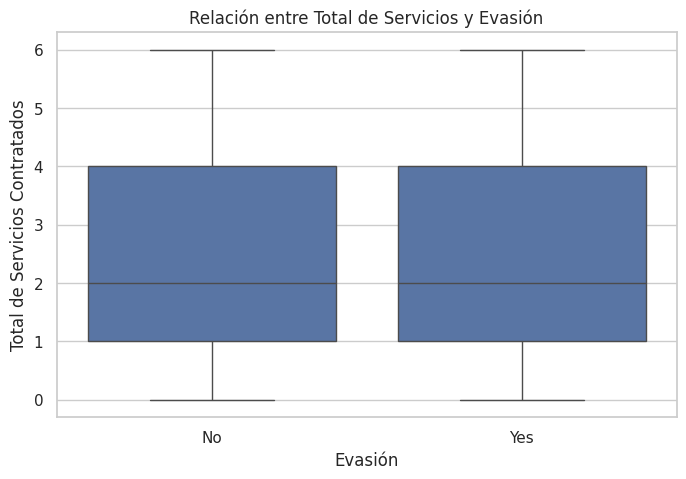

Promedio de servicios por grupo de evasión:
 Churn
No     2.703131
Yes    2.519529
Name: total_servicios, dtype: float64


In [ ]:
#Relacionando total servicios contratados con evasión#

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_normalizado, x='Churn', y='total_servicios')
plt.title('Relación entre Total de Servicios y Evasión')
plt.ylabel('Total de Servicios Contratados')
plt.xlabel('Evasión')
plt.show()

# Tabla de medias
medias = datos_normalizado.groupby('Churn')['total_servicios'].mean()
print("Promedio de servicios por grupo de evasión:\n", medias)

Revisando si hay alguna relación con los servicios de streaming contratados:

Proporción de evasión por contratación de StreamingTV:
 Churn                        No        Yes
internet_StreamingTV                      
0                     75.668819  24.331181
1                     69.929812  30.070188

Proporción de evasión por contratación de StreamingMovies:
 Churn                            No        Yes
internet_StreamingMovies                      
0                         75.620506  24.379494
1                         70.058565  29.941435


<Figure size 600x400 with 0 Axes>

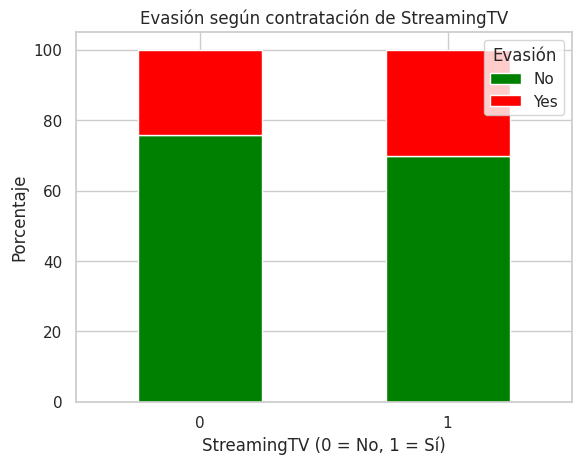

<Figure size 600x400 with 0 Axes>

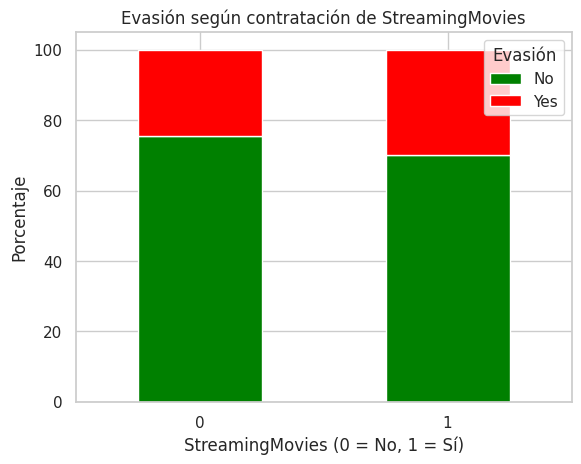

In [ ]:
#revisando con servicios de streaming
# Tabla de contingencia StreamingTV vs Churn
tabla_tv = pd.crosstab(datos_normalizado['internet_StreamingTV'], datos_normalizado['Churn'], normalize='index') * 100
print("Proporción de evasión por contratación de StreamingTV:\n", tabla_tv)

# Tabla de contingencia StreamingMovies vs Churn
tabla_movies = pd.crosstab(datos_normalizado['internet_StreamingMovies'], datos_normalizado['Churn'], normalize='index') * 100
print("\nProporción de evasión por contratación de StreamingMovies:\n", tabla_movies)

# Gráfico StreamingTV
plt.figure(figsize=(6,4))
tabla_tv.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Evasión según contratación de StreamingTV')
plt.ylabel('Porcentaje')
plt.xlabel('StreamingTV (0 = No, 1 = Sí)')
plt.legend(title='Evasión', loc='upper right')
plt.xticks(rotation=0)
plt.show()

# Gráfico StreamingMovies
plt.figure(figsize=(6,4))
tabla_movies.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Evasión según contratación de StreamingMovies')
plt.ylabel('Porcentaje')
plt.xlabel('StreamingMovies (0 = No, 1 = Sí)')
plt.legend(title='Evasión', loc='upper right')
plt.xticks(rotation=0)
plt.show()

Verificando si hay el tipo de servicio de internet influye en las cancelaciones:

Proporción de evasión (Churn) por tipo de Internet Service (%):
 Churn                            No        Yes
internet_InternetService                      
DSL                       81.040892  18.959108
Fiber optic               58.107235  41.892765
No                        92.595020   7.404980


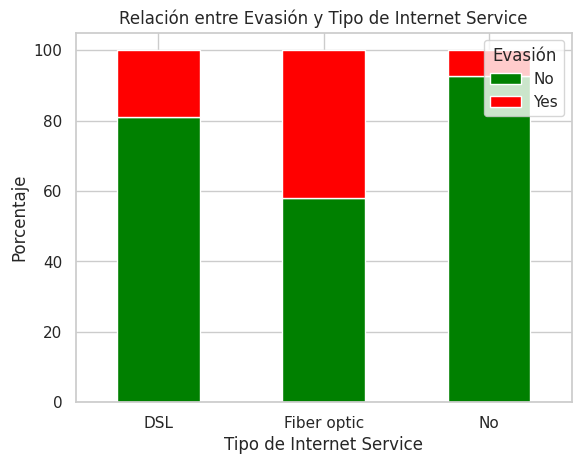

In [ ]:
#relación entre evasión y servicio de internet
# Tabla de proporciones cruzadas
tabla_internet = pd.crosstab(datos_normalizado['internet_InternetService'], datos_normalizado['Churn'], normalize='index') * 100
print("Proporción de evasión (Churn) por tipo de Internet Service (%):\n", tabla_internet)

# Gráfico de barras apiladas
tabla_internet.plot(kind='bar', stacked=True, color=['green', 'red'])
plt.title('Relación entre Evasión y Tipo de Internet Service')
plt.ylabel('Porcentaje')
plt.xlabel('Tipo de Internet Service')
plt.legend(title='Evasión', loc='upper right')
plt.xticks(rotation=0)
plt.show()

Con la información anterior, verificamos si los clientes con fibra óptica pagan más por servicio:

/tmp/ipython-input-45-325953196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=datos_normalizado, x='internet_InternetService', y='Cuentas_Diarias', palette='Set2')


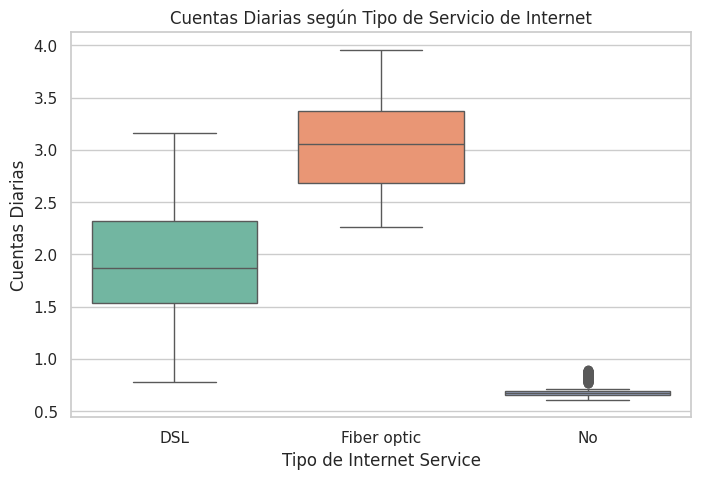

In [ ]:
#Cuentas diarias por tipo de servicio de internet
plt.figure(figsize=(8, 5))
sns.boxplot(data=datos_normalizado, x='internet_InternetService', y='Cuentas_Diarias', palette='Set2')

plt.title('Cuentas Diarias según Tipo de Servicio de Internet')
plt.ylabel('Cuentas Diarias')
plt.xlabel('Tipo de Internet Service')
plt.show()

#Conclusiones



Con base en la información analizada, se concluye lo siguiente:

*   Hay una alta tasa de evasión de clientes, más del 25% de los clientes originales de TelecomX.
*   Los clientes que han cancelado han tenido mayor cuota diaria por los servicios contratados.
*   Los clientes que han cancelado son los de menor antiguedad.
*   Revisando la información de los tipos de contrato con base a que los clientes que más cancelan son los de menor antiguead, encontramos que los contratos Month-to-Month son los que tienen mayor tasa de evasión, teniendo mayor pertenencia en clientes con contratos anuales y bianuales.
*   No hay una diferencia signficativa entre los clientes que tienen pareja o el género del cliente respecto a la evasión.
*   Tanto los clientes que continúan en la empresa como los que han cancelado coinciden en el número de servicios contratados.
*   Al revisar el tipo de servicio de internet ofrecido por TelecomX se observa que de los clientes que cancelan hay una alta tasa en los que tenían contratado fibra óptica, y coincide que los clientes con fibra son los que tienen mayor cuota.
*  Habrá que generar estrategias y ofrecer paquetes con mayor flexibilidad para los clientes, pensando que el coste de internet por fibra sea la causa de la cancelación, o generar encuestas de satisfacción de servicio, pensando que haya fallas con la tecnología de fibra.

